# Preliminary CSV, title price and stock available only

**Data Ingest**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/books.csv"
df = pd.read_csv(file_path)


**Load the dataset**

In [8]:
# Preview the loaded data
df.head()


,web-scraper-order,web-scraper-start-url,book,book-href,title,price,availability,image-src,genre,pagination,pagination-href
0,1678794419-429,http://books.toscrape.com/catalogue/page-1.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1678794421-430,http://books.toscrape.com/catalogue/page-1.html,"1,000 Places to See ...",http://books.toscrape.com/catalogue/1000-place...,"1,000 Places to See Before You Die",£26.08,In stock (1 available),../../media/cache/9e/10/9e106f81f65b293e488718...,Home,next,http://books.toscrape.com/catalogue/page-50.html
2,1678794423-431,http://books.toscrape.com/catalogue/page-1.html,1st to Die (Women's ...,http://books.toscrape.com/catalogue/1st-to-die...,1st to Die (Women's Murder Club #1),£53.98,In stock (1 available),../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...,Home,next,http://books.toscrape.com/catalogue/page-50.html
3,1678794425-432,http://books.toscrape.com/catalogue/page-1.html,A Spy's Devotion (The ...,http://books.toscrape.com/catalogue/a-spys-dev...,A Spy's Devotion (The Regency Spies of London #1),£16.97,In stock (1 available),../../media/cache/f9/6b/f96b60a7614c4e3e868b82...,Home,next,http://books.toscrape.com/catalogue/page-50.html
4,1678794427-433,http://books.toscrape.com/catalogue/page-1.html,"Ajin: Demi-Human, Volume 1 ...",http://books.toscrape.com/catalogue/ajin-demi-...,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£57.06,In stock (1 available),../../media/cache/30/98/309814b6eeba469f4c7411...,Home,next,http://books.toscrape.com/catalogue/page-50.html


**Cleaner dataframe**

In [47]:
df1 = df.loc[:, ['title', 'price', 'availability']]

# extracting the number of stocks available only
df1['Stocks Available?'] = df1['availability'].str.extract(r'\((\d+) available\)')
df1['Stocks Available?'] = df1['Stocks Available?'].astype(float)


# deleting the redundant column and row
del df1['availability']
df1 = df1.drop(0)

# Convert price column to float
df1['price'] = df1['price'].apply(lambda x: float(x.strip('£')))


df1.head()

,title,price,Stocks Available?
1,"1,000 Places to See Before You Die",26.08,1.0
2,1st to Die (Women's Murder Club #1),53.98,1.0
3,A Spy's Devotion (The Regency Spies of London #1),16.97,1.0
4,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,1.0
5,Alice in Wonderland (Alice's Adventures in Won...,55.53,1.0


**Top 10 most expensive books**

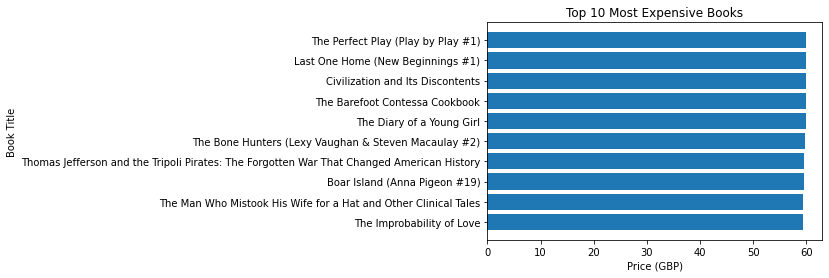

In [48]:
import matplotlib.pyplot as plt

# Sort dataframe by price in descending order
df1 = df1.sort_values(by='price', ascending=False)

# Select top 10 rows
df1_top10 = df1.head(10)

# Reverse the order of rows to have the most expensive book on top
df1_top10 = df1_top10.iloc[::-1]

# Create bar graph
plt.barh(df1_top10['title'], df1_top10['price'])
plt.ylabel('Book Title')
plt.xlabel('Price (GBP)')
plt.title('Top 10 Most Expensive Books')
plt.show()


**Top 10 Books with most stocks available**

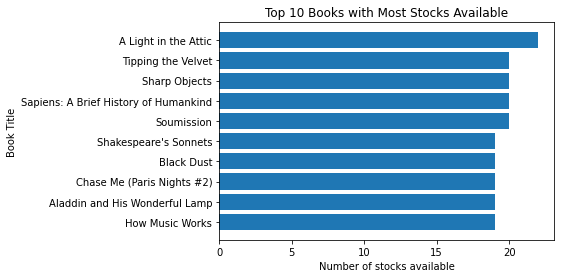

In [51]:
# Sort dataframe by price in descending order
df1 = df1.sort_values(by='Stocks Available?', ascending=False)

# Select top 10 rows
df1_top10 = df1.head(10)

# Reverse the order of rows to have the most expensive book on top
df1_top10 = df1_top10.iloc[::-1]

# Create bar graph
plt.barh(df1_top10['title'], df1_top10['Stocks Available?'])
plt.ylabel('Book Title')
plt.xlabel('Number of stocks available')
plt.title('Top 10 Books with Most Stocks Available')
plt.show()

**Top 10 Most selling opportunity**

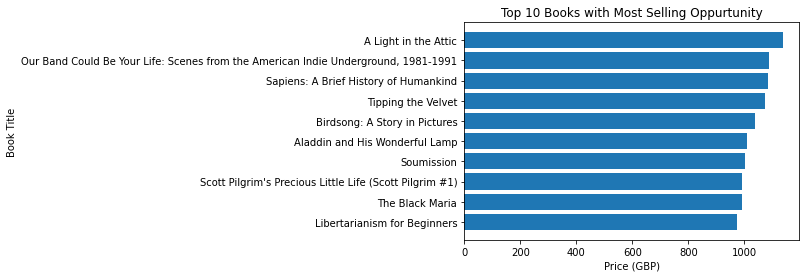

In [50]:
# Create new column with product of price and Stocks Available
df1['selling_opportunity'] = df1['price'] * df1['Stocks Available?']

# Sort dataframe by selling_opportunity in descending order
df1_sorted = df1.sort_values(by='selling_opportunity', ascending=False)

# Display sorted dataframe
df1_sorted_top10 = df1_sorted.head(10)

# Reverse the order of rows to have the most expensive book on top
df1_sorted_top10 = df1_sorted_top10.iloc[::-1]

# Create bar graph
plt.barh(df1_sorted_top10['title'], df1_sorted_top10['selling_opportunity'])
plt.ylabel('Book Title')
plt.xlabel('Price (GBP)')
plt.title('Top 10 Books with Most Selling Oppurtunity')
plt.show()


# Books with genre

In [53]:
# Load CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/books2.csv"
df2 = pd.read_csv(file_path)
df2.head()

,web-scraper-order,web-scraper-start-url,book,book-href,title,price,availability,image-src,genre,pagination,pagination-href
0,1678797416-1430,http://books.toscrape.com/catalogue/page-1.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1678797419-1431,http://books.toscrape.com/catalogue/page-1.html,"1,000 Places to See ...",http://books.toscrape.com/catalogue/1000-place...,"1,000 Places to See Before You Die",£26.08,In stock (1 available),../../media/cache/9e/10/9e106f81f65b293e488718...,Travel,next,http://books.toscrape.com/catalogue/page-50.html
2,1678797422-1432,http://books.toscrape.com/catalogue/page-1.html,1st to Die (Women's ...,http://books.toscrape.com/catalogue/1st-to-die...,1st to Die (Women's Murder Club #1),£53.98,In stock (1 available),../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...,Mystery,next,http://books.toscrape.com/catalogue/page-50.html
3,1678797424-1433,http://books.toscrape.com/catalogue/page-1.html,A Spy's Devotion (The ...,http://books.toscrape.com/catalogue/a-spys-dev...,A Spy's Devotion (The Regency Spies of London #1),£16.97,In stock (1 available),../../media/cache/f9/6b/f96b60a7614c4e3e868b82...,Historical Fiction,next,http://books.toscrape.com/catalogue/page-50.html
4,1678797426-1434,http://books.toscrape.com/catalogue/page-1.html,"Ajin: Demi-Human, Volume 1 ...",http://books.toscrape.com/catalogue/ajin-demi-...,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£57.06,In stock (1 available),../../media/cache/30/98/309814b6eeba469f4c7411...,Sequential Art,next,http://books.toscrape.com/catalogue/page-50.html


**Cleaner data frame**

In [55]:
df2 = df2.loc[:, ['title', 'price', 'availability', 'genre']]

# extracting the number of stocks available only
df2['Stocks Available?'] = df2['availability'].str.extract(r'\((\d+) available\)')
df2['Stocks Available?'] = df2['Stocks Available?'].astype(float)


# deleting the redundant column and row
del df2['availability']
df2 = df2.drop(0)

# Convert price column to float
df2['price'] = df2['price'].apply(lambda x: float(x.strip('£')))


df2.head()

,title,price,genre,Stocks Available?
1,"1,000 Places to See Before You Die",26.08,Travel,1.0
2,1st to Die (Women's Murder Club #1),53.98,Mystery,1.0
3,A Spy's Devotion (The Regency Spies of London #1),16.97,Historical Fiction,1.0
4,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Sequential Art,1.0
5,Alice in Wonderland (Alice's Adventures in Won...,55.53,Classics,1.0


**Top 10 Genres with most unique book counts**

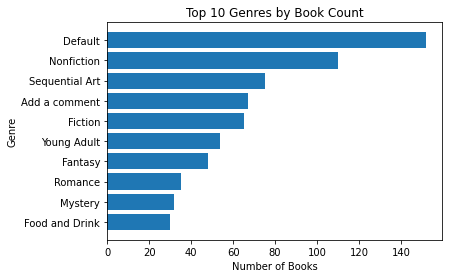

In [63]:

# Group by genres and count number of books in each genre
df2_grouped = df2.groupby('genre').count()['title'].reset_index()

# Sort by book count in descending order
df2_grouped = df2_grouped.sort_values(by='title', ascending=False)



# Select top 10 genres
df2_grouped = df2_grouped.iloc[::-1]
df2_top10 = df2_grouped.tail(10)

# Create horizontal bar chart
plt.barh(df2_top10['genre'], df2_top10['title'])
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Book Count')
plt.show()



**Top 10 Genres to keep**

In [68]:
# Group by genre and get mean price and sum of stocks available
df2_grouped = df2.groupby('genre').agg({'price': 'mean', 'Stocks Available?': 'sum'})

# Sort by price in descending order and stocks available in ascending order
df2_sorted = df2_grouped.sort_values(['price', 'Stocks Available?'], ascending=[False, True])

# Get top 10 genres
top10_genres = df2_sorted.head(10).index.tolist()

# Filter df2 for top 10 genres
df2_top10 = df2[df2['genre'].isin(top10_genres)]

df2_sorted.head(10)

,price,Stocks Available?
genre,,
Suspense,58.330000,8.0
Novels,54.810000,9.0
Politics,53.613333,45.0
Health,51.452500,49.0
New Adult,46.383333,49.0
Christian,42.496667,37.0
Sports and Games,41.166000,10.0
Self Help,40.620000,59.0
Travel,39.794545,89.0
